In [27]:
'''
update:
- 2025-06-27: time-locked to target onset
- 2025-07-02: time-locked to target onset, better code
- 2025-07-07: added code for condition-level epoching; improved saving process, avoiding dirty pickle method
'''

'\nupdate:\n- 2025-06-27: time-locked to target onset\n'

# Libraries

In [2]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd


from scipy import signal
from scipy import stats
from scipy.io import wavfile

# from pybv import write_brainvision
from pyprep.prep_pipeline import PrepPipeline
from mne_icalabel import label_components


# working directory
work_dir = '/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/'

# Trigger lag fix

## parameters

In [29]:
# directory
input_dir = work_dir +'data_raw/'
output_dir = work_dir + 'data_preprocessed/1_trigger_lag_corrected/'
# create a folder if the folder doesn't exist
os.makedirs(output_dir, exist_ok=True)

# subjects to exclude
exclude_subs = [
    '807',
    '810',
    '811',
    '816',
    '817',
]

# trigger searching window (actual trigger time based on audio - trigger time in the data)
t_left = -0.01
t_right = 0.5

Here we fix trigger lag fix and recode the event for item-level analysis.

Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_843.vhdr...
Setting channel info structure...
Reading 0 ... 828889  =      0.000 ...  1657.778 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_843_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_843_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_843_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_834.vhdr...
Setting channel info structure...
Reading 0 ... 877729  =      0.000 ...  1755.458 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_834_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_834_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_834_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_822.vhdr...
Setting channel info structure...
Reading 0 ... 869709  =      0.000 ...  1739.418 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_822_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_822_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_822_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_818.vhdr...
Setting channel info structure...
Reading 0 ... 800729  =      0.000 ...  1601.458 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_818_corr.fif
Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_818_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_819.vhdr...
Setting channel info structure...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_818_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Reading 0 ... 821849  =      0.000 ...  1643.698 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_819_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_819_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_819_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_823.vhdr...
Setting channel info structure...
Reading 0 ... 826229  =      0.000 ...  1652.458 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_823_corr.fif
Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_823_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_835.vhdr...
Setting channel info structure...
Reading 0 ... 888269  =      0.000 ...  1776.538 secs...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_823_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_835_corr.fif
Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_835_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_842.vhdr...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_835_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Setting channel info structure...
Reading 0 ... 828889  =      0.000 ...  1657.778 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_842_corr.fif
Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_842_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_815.vhdr...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_842_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Setting channel info structure...
Reading 0 ... 1341849  =      0.000 ...  2683.698 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_815_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_815_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_815_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_803.vhdr...
Setting channel info structure...
Reading 0 ... 1044919  =      0.000 ...  2089.838 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_803_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_803_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_803_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_832.vhdr...
Setting channel info structure...
Reading 0 ... 851659  =      0.000 ...  1703.318 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_832_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_832_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_832_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_824.vhdr...
Setting channel info structure...
Reading 0 ... 947969  =      0.000 ...  1895.938 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_824_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_824_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_824_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_808.vhdr...
Setting channel info structure...
Reading 0 ... 832439  =      0.000 ...  1664.878 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_808_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_808_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_808_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_849.vhdr...
Setting channel info structure...
Reading 0 ... 836139  =      0.000 ...  1672.278 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_849_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_849_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_849_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_828.vhdr...
Setting channel info structure...
Reading 0 ... 789729  =      0.000 ...  1579.458 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_828_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_828_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_828_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_853.vhdr...
Setting channel info structure...
Reading 0 ... 815679  =      0.000 ...  1631.358 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_853_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_853_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_853_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_804.vhdr...
Setting channel info structure...
Reading 0 ... 895379  =      0.000 ...  1790.758 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_804_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_804_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_804_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_812.vhdr...
Setting channel info structure...
Reading 0 ... 932279  =      0.000 ...  1864.558 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_812_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_812_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_812_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_845.vhdr...
Setting channel info structure...
Reading 0 ... 919769  =      0.000 ...  1839.538 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_845_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_845_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_845_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_844.vhdr...
Setting channel info structure...
Reading 0 ... 1055509  =      0.000 ...  2111.018 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_844_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_844_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_844_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_813.vhdr...
Setting channel info structure...
Reading 0 ... 877449  =      0.000 ...  1754.898 secs...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_813_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_813_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_813_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_805.vhdr...
Setting channel info structure...
Reading 0 ... 843499  =      0.000 ...  1686.998 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_805_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_805_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_805_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_852.vhdr...
Setting channel info structure...
Reading 0 ... 877099  =      0.000 ...  1754.198 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_852_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_852_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_852_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_829.vhdr...
Setting channel info structure...
Reading 0 ... 820379  =      0.000 ...  1640.758 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_829_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_829_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_829_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_848.vhdr...
Setting channel info structure...
Reading 0 ... 834429  =      0.000 ...  1668.858 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_848_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_848_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_848_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_809.vhdr...
Setting channel info structure...
Reading 0 ... 800879  =      0.000 ...  1601.758 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_809_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_809_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_809_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_825.vhdr...
Setting channel info structure...
Reading 0 ... 892309  =      0.000 ...  1784.618 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_825_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_825_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_825_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_raw/codeswitch_833.vhdr...
Setting channel info structure...
Reading 0 ... 789619  =      0.000 ...  1579.238 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_833_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_2016/3131911552.py:210: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_833_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/1_trigger_lag_corrected/codeswitch_833_corr.fif
[done]


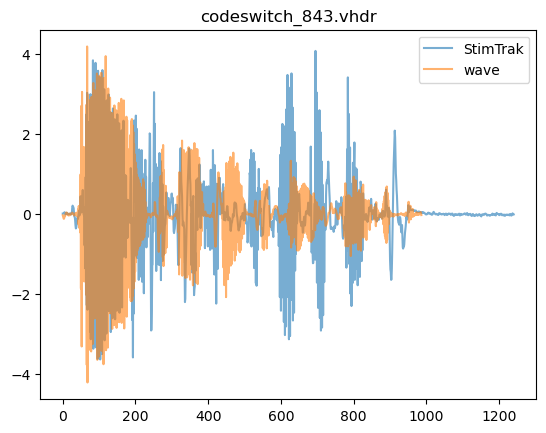

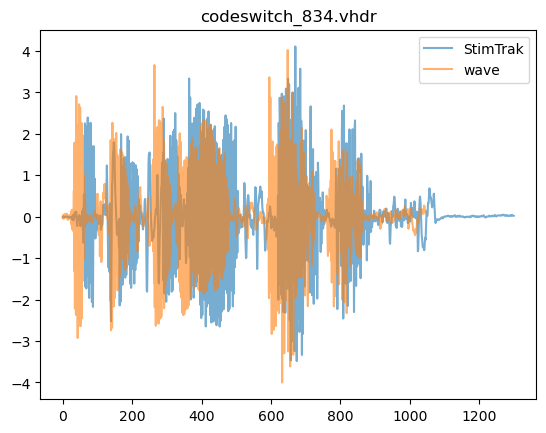

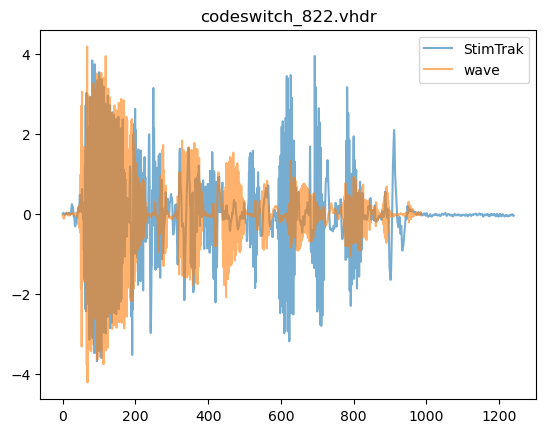

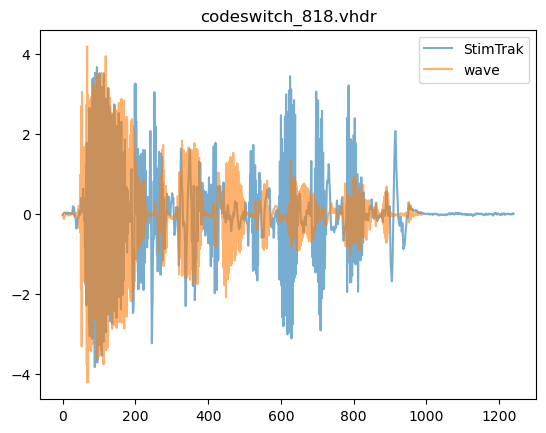

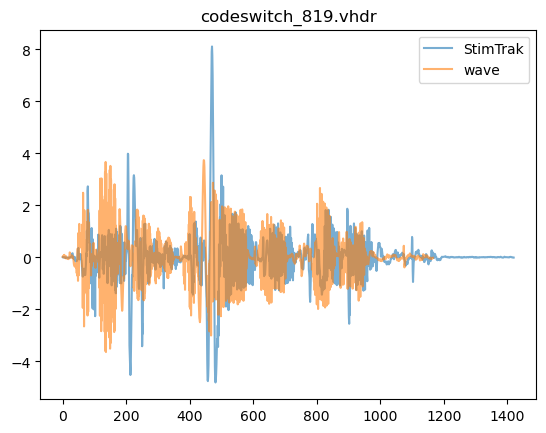

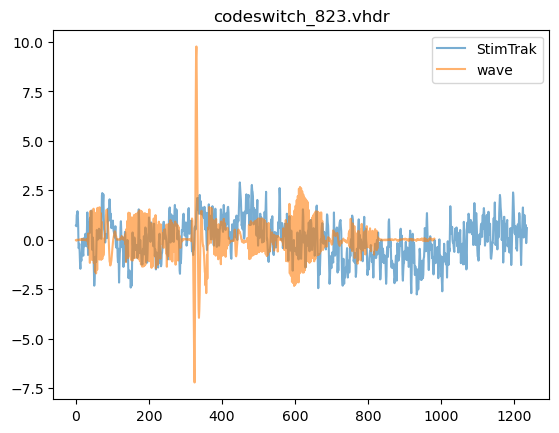

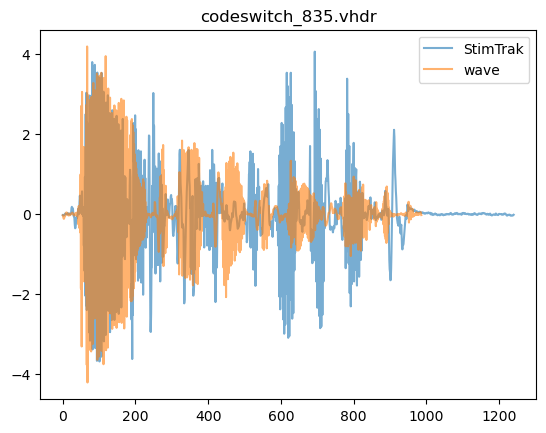

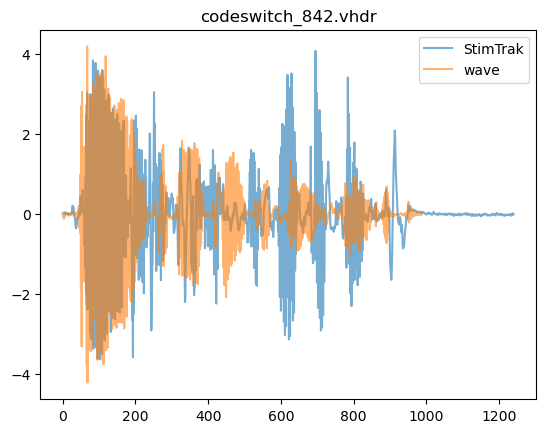

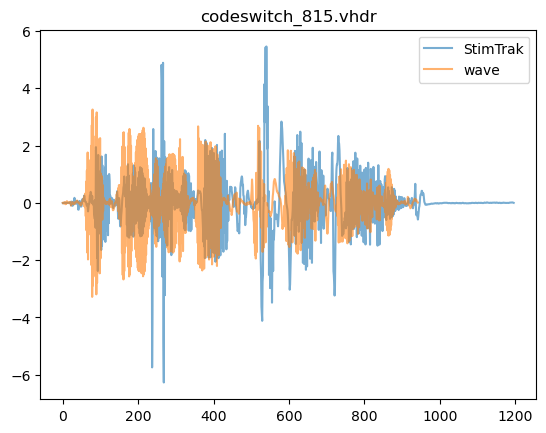

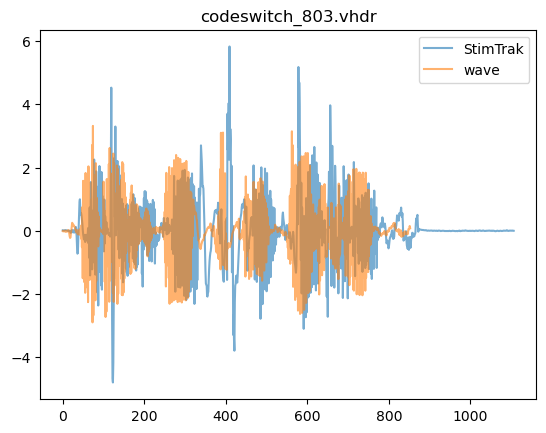

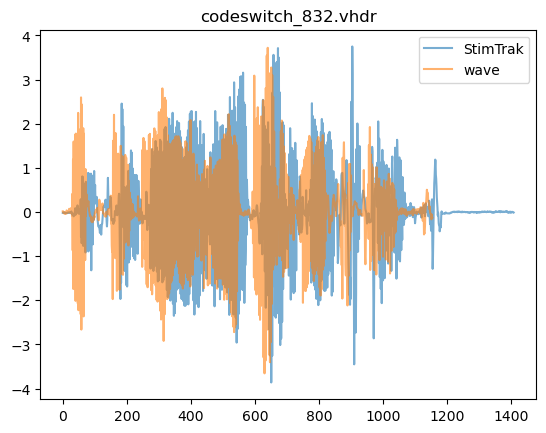

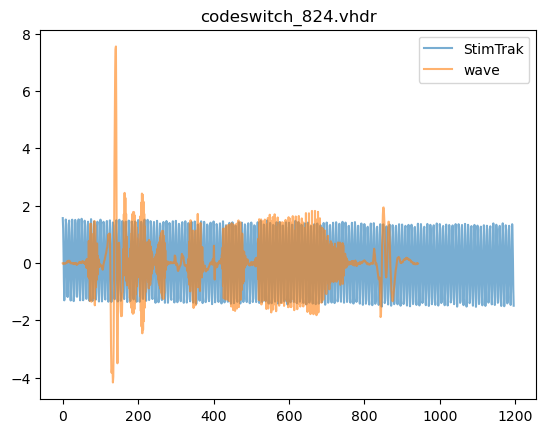

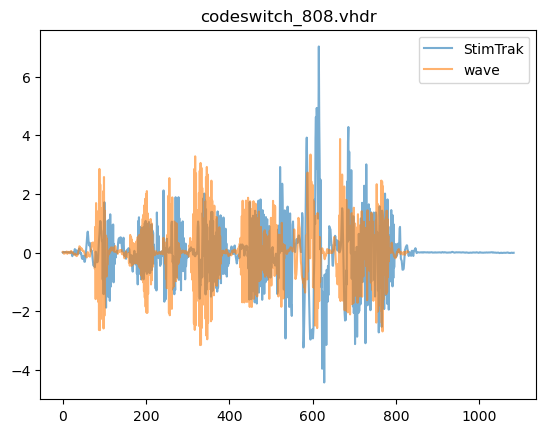

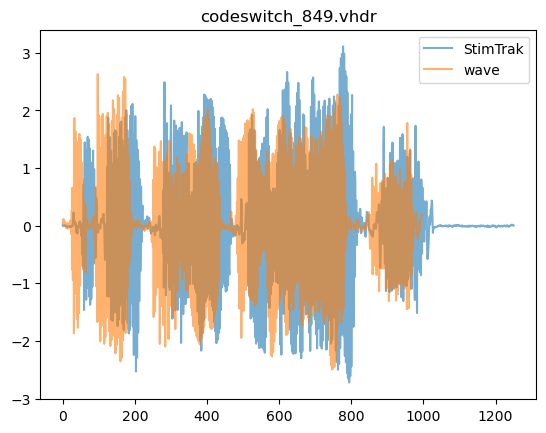

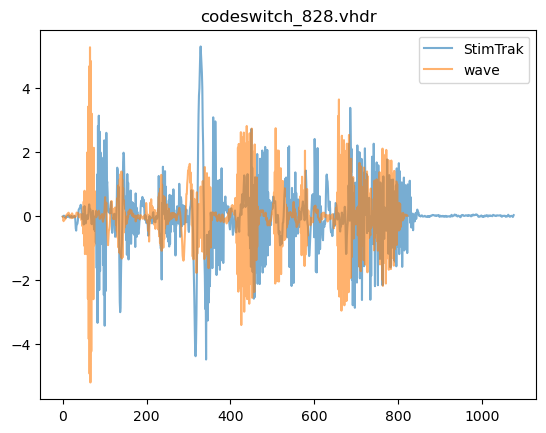

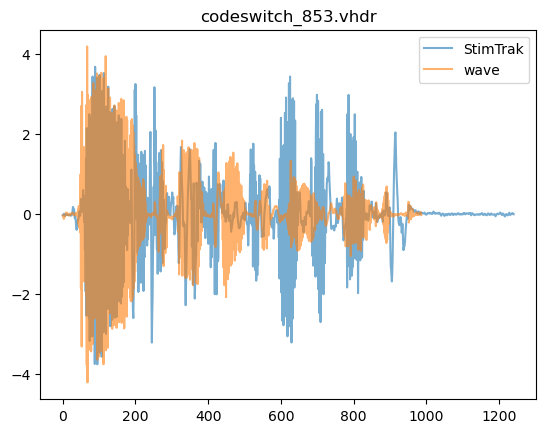

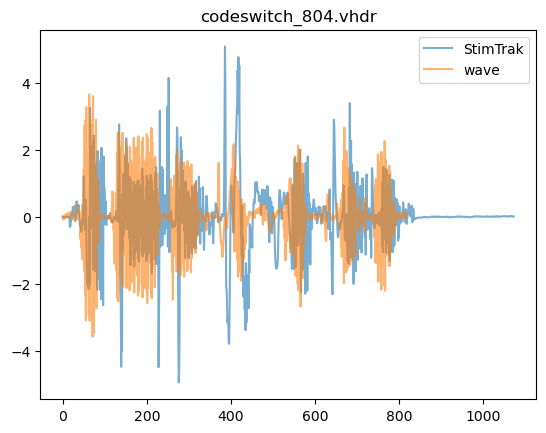

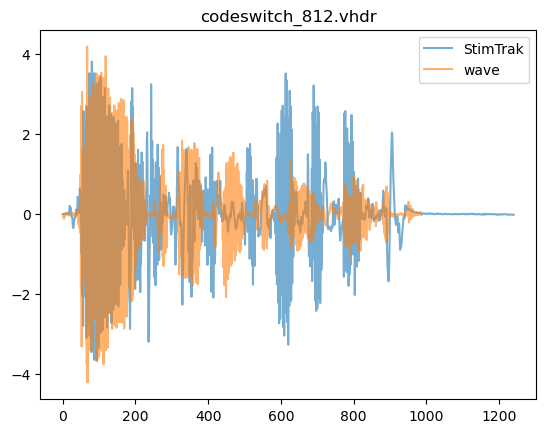

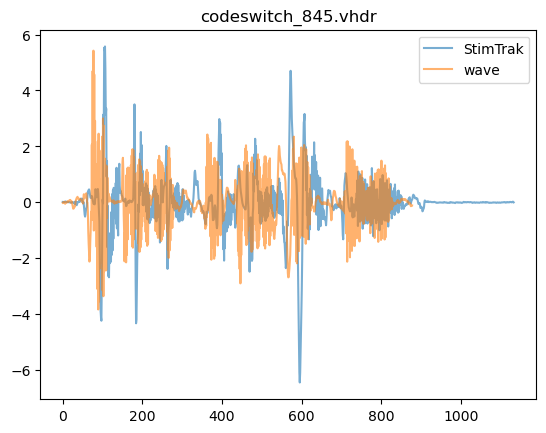

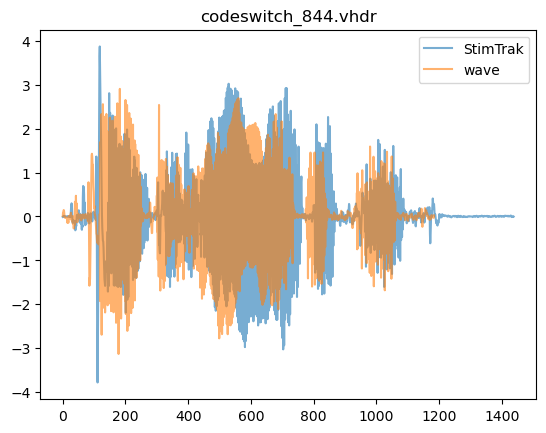

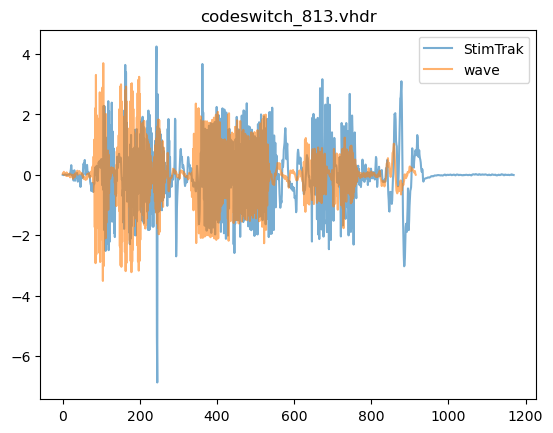

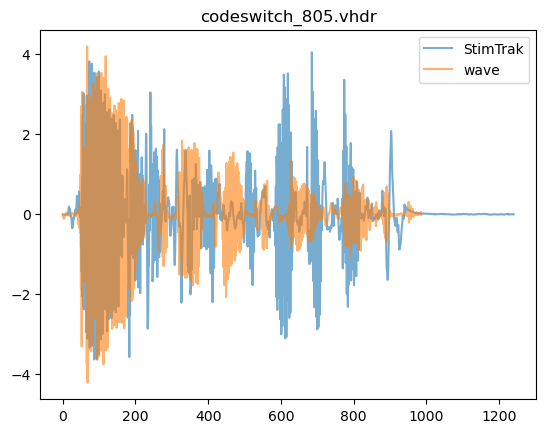

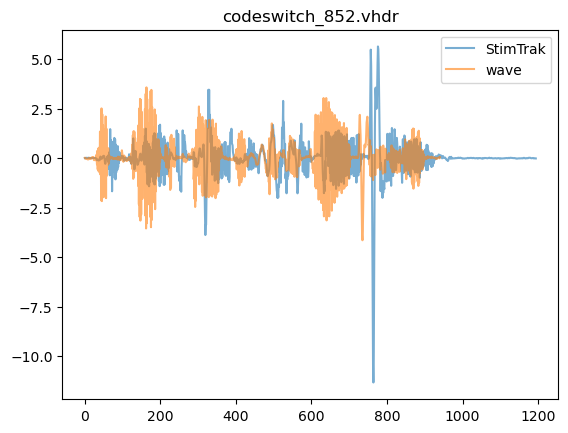

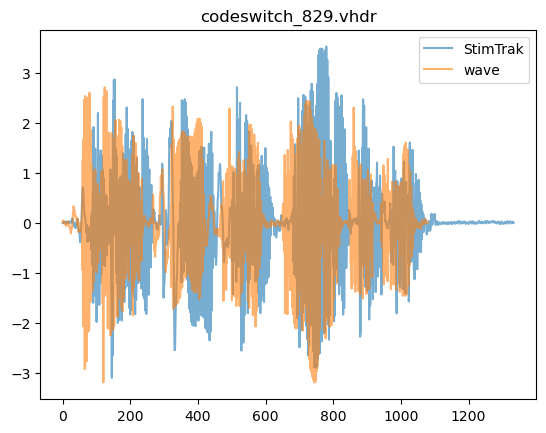

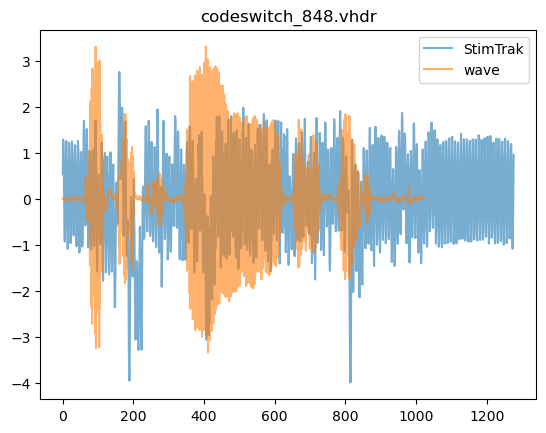

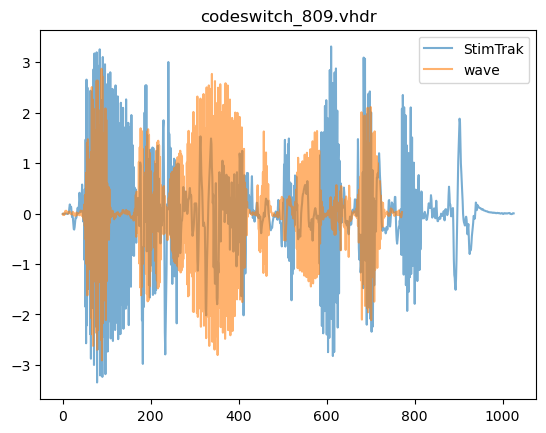

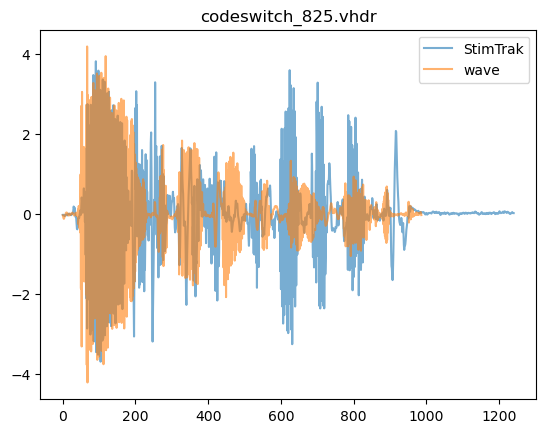

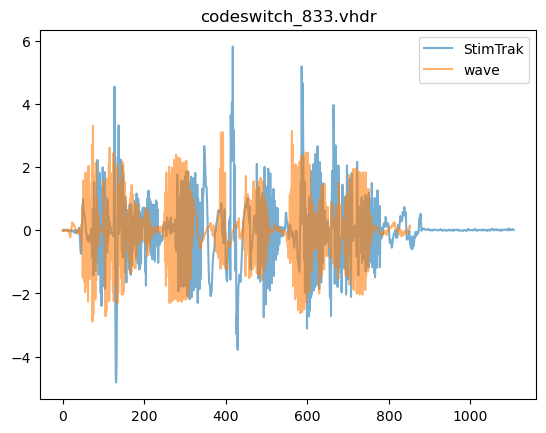

In [31]:
#### create dictionaries for item-level codes and descriptions ####
df = pd.read_csv("mapping_file.txt", delimiter='\t')
mapping_file2code = dict(zip(df['filename'], df['item_code']))
mapping_code2description = dict(zip(df['item_code'], df['description']))
#############################################################

# get list of file names
all_files = os.listdir(input_dir)

# for each file
for file in all_files:
    if file.endswith('.vhdr') and (file.split('.')[0].split('_')[1] not in exclude_subs) and (file.split('.')[0]+ '_corr.fif' not in os.listdir(output_dir)):

        # read in vhdr files
        raw = mne.io.read_raw_brainvision(input_dir + file, preload = True)

        # extract sampling rate
        eeg_sfreq = raw.info['sfreq']

        #### get trigger code, audio data, and audio length ####
        
        # initialize dictionaries
        trigger_dict = {} # marker: [description list]
        audio = {} # filename: data
        lengths = {} # filename: audio length

        # read in the mapping file
        with open('mapping_file.txt','r') as f:
            # skip the first line (header)
            next(f)
            for line in f:
                # read in the current line
                line = line.replace('\n','')
                # get info
                filename, marker, description, item_code, target_onset = line.split('\t')
        
                # initialize a filename list for each trigger code
                if marker not in trigger_dict.keys():
                    trigger_dict[marker] = []
                # add the filename to the list
                trigger_dict[marker].append(filename)

                # get audio data for each file
                if filename not in audio.keys():
                
                    # get sample rate and data of the audio file
                    sampleRate, data = wavfile.read(work_dir + 'codeswitch_mystim/stimuli/{}'.format(filename))
            
                    # the sound file is stereo, so take only 1 channel's data
                    data = data[:,0]
            
                    # calculate sound file length
                    lengths[filename] = len(data)/sampleRate
            
                    # reduce the sampling rate of the audio file by the factor of int(sampleRate/eeg_sfreq)
                    data_downsampled = signal.decimate(data, int(sampleRate/eeg_sfreq), ftype='fir')
                    
                    # add audio data the audio dictionary
                    audio[filename] = data_downsampled
        ####################################################


        #### get events ####
        # for each stimulus, mark the block info
        events_from_annot, event_dict = mne.events_from_annotations(raw, verbose='WARNING')
        # get events with trigger code 1-4
        mask = (events_from_annot[:, 2] <= 4)
        events_from_annot = events_from_annot[mask]
        ######################
        
        
        #### cross correction to find the audio file and correct lag correction ####
        
        # initialize
        delays = np.array([]) # a delay list
        bad_stim = [] # a bad stim list
        corr_results = [] # list of each event's max cross-correlation coefficient
        filename_results = [] # list of each event's filename
        
        # loop over each event
        for i in range(len(events_from_annot)):

            # get current event
            event = events_from_annot[i]
            # get the onset latency
            time = event[0]/eeg_sfreq
            # get the marker
            marker = str(event[2])

            # initialize dictonary of each file and its max correlation coefficent
            singleFile_maxCorr_dict = {}
            # initialize dictionary for each file and its lag corresponding to the max correlation coefficent
            singleFile_maxCorrLag_dict = {}

            #### find the audio file for the current event, recode the marker, and record the lag info ####
            for name in trigger_dict[marker]:
                
                # get the data from the sound channel
                audio_eeg = raw.get_data(
                    picks = ['StimTrak'],
                    tmin = time + t_left,
                    tmax = time + lengths[name] + t_right,
                )[0]
                
                # get actual stimulus data
                audio_stim = audio[name]
                
                # z-score normalization (subtract mean, divide by std)
                audio_eeg = (audio_eeg - np.mean(audio_eeg)) / np.std(audio_eeg)
                audio_stim = (audio_stim - np.mean(audio_stim)) / np.std(audio_stim)
            
                # cross-correlation
                corr = signal.correlate(audio_eeg, audio_stim, mode='full')
                # normalize for signal duration
                corr = corr / (np.linalg.norm(audio_eeg) * np.linalg.norm(audio_stim))
                # find peak correlation value
                singleFile_maxCorr_dict[name] = np.max(corr)

                # get lags for cross-correlation
                lags = signal.correlation_lags(
                    audio_eeg.size,
                    audio_stim.size,
                    mode="full")
                # find the lag for peak correlation
                singleFile_maxCorrLag_dict[name] = lags[np.argmax(corr)] + t_left*eeg_sfreq

            # get the file giving max correlation
            max_file = max(singleFile_maxCorr_dict, key=singleFile_maxCorr_dict.get)
            # get the maximum correlation among all files
            max_corr = singleFile_maxCorr_dict[max_file]
            # get the lag
            lag = singleFile_maxCorrLag_dict[max_file]
            # add item-level trigger code
            events_from_annot[i][2] = mapping_file2code[max_file]
                
            # if the maximum correction is less than a threshold
            if round(max_corr,1) < 0.5:
                # mark the stim bad
                bad_stim.append(i)

            # add the maximum correlation info for the current event
            corr_results.append(max_corr)
            filename_results.append(max_file)
            delays = np.append(delays,lag)
            ##################################################

        #### plot the stimtrak eeg and the audio data of the event with the minimum correlation of the current file ####

        # get min corr
        min_corr = np.argmin(corr_results)
        # get current event info
        event = events_from_annot[min_corr]
        # get the onset latency
        time = event[0]/eeg_sfreq
        # get the file name of the event
        name = filename_results[min_corr]
        # get the stimtrak data
        audio_eeg = raw.get_data(
            picks = ['StimTrak'],
            tmin = time + t_left,
            tmax = time + lengths[name] + t_right,
        )[0]
        # actual stimulus data
        audio_stim = audio[name]
        # z-score normalization (subtract mean, divide by std)
        audio_eeg = (audio_eeg - np.mean(audio_eeg)) / np.std(audio_eeg)
        audio_stim = (audio_stim - np.mean(audio_stim)) / np.std(audio_stim)
        # plot
        fig, ax = plt.subplots()
        ax.plot(audio_eeg, label = 'StimTrak', alpha = 0.6)
        ax.plot(audio_stim, label = 'wave', alpha = 0.6)
        ax.set_title(file)
        ax.legend()
        fig.savefig(output_dir + file.split('.')[0] + "_minCor.png", dpi=300, bbox_inches='tight')
        ##########################
                
        # record number of bad stims of the current file
        if len(bad_stim)>0:
            # wave the number of bad stims to a file
            with open(output_dir + 'bad_stim.txt', 'a+') as f:
                _ =f.write(file + '\t' + str(len(bad_stim)) + ' bad stims' + '\n')

        
        # remove events of bad stims
        events_from_annot = np.delete(events_from_annot, bad_stim, 0)
        
        # remove lags of bad stims
        delays = np.delete(delays, bad_stim, 0)

        # correct for trigger lag
        events_from_annot[:,0] = events_from_annot[:,0] + delays       
        
        # create item-level annotations
        annot_from_events = mne.annotations_from_events(
            events = events_from_annot,
            event_desc = mapping_code2description, # item-level mapping
            sfreq = eeg_sfreq
        )
        
        # set annotations
        raw.set_annotations(annot_from_events)
        
        # drop the audio channel in data
        raw.drop_channels(['StimTrak'])

        # save single-trial delay file
        np.savetxt(output_dir + file.replace('.vhdr', '_delays.txt'), delays, fmt='%i')
        
        # save as a file-into-file data
        raw.save(output_dir + file.split('.')[0]+ '_corr.fif')

# Bad channel correction
- filtering
- resampling
- remove line noise
- bad channel detection & repairing
- add back reference channel TP9

## parameters

In [32]:
#### parameters ####

# set directory
input_dir = work_dir + 'data_preprocessed/1_trigger_lag_corrected/'
output_dir = work_dir + 'data_preprocessed/2_bad_channel_corrected/'
# create a folder if the folder doesn't exist
os.makedirs(output_dir, exist_ok=True)

# filter cutoff frequencies (low/high)
f_low = 1
f_high = 100

# resampling frequency
f_res = 250

# line frequency
line_freq = 60

# preprocessing parameters
prep_params = {
    "ref_chs": 'eeg',
    "reref_chs": 'eeg', # average re-reference
    "line_freqs": np.arange(line_freq, f_res/2, line_freq),
}

# create a montage file for the pipeline
montage = mne.channels.make_standard_montage("standard_1020")

# interpolation method
# method=dict(eeg="spline")

In [34]:
#####################################################
#### Preprocessing (filtering, resampling, bad channel detection/interpoloation, re-reference) ####
#####################################################

# get all file namesin the folder
all_input = os.listdir(input_dir)
all_output = os.listdir(output_dir)

# for each file
for file in all_input:
    if file.endswith("corr.fif") and (file.split('.')[0]+ '_prep.fif' not in all_output):
        
        # read in file
        raw = mne.io.read_raw_fif(input_dir + file, preload=True)

        # set channel type for EOG channels
        raw.set_channel_types({'Fp1':'eog', 'Fp2':'eog'})

        # filter
        raw.filter(l_freq = f_low, h_freq = f_high)
        
        #### cut off the beginning and ending part ####b
        
        # get the onset of the first and the last event ####
        events_from_annot, event_dict = mne.events_from_annotations(raw, verbose='WARNING')

        #### crop the file to cut off the first the last 10s portion which maybe noisy ####
        # define the beginning time (in seconds)
        crop_start = events_from_annot[0][0]/raw.info['sfreq'] - 10

        # define the ending time (in seconds)
        crop_end = events_from_annot[-1][0]/raw.info['sfreq'] + 10

        # crop the data
        raw.crop(
            tmin=max(crop_start, raw.times[0]), 
            tmax=min(crop_end, raw.times[-1])
        )
        ####################################################################################
        
        # resample
        raw.resample(sfreq = f_res)

        # read in channel location info
        raw.set_montage(montage)
        
        ####  Use PrePipeline to preprocess ####
        '''
        1. detect and interpolate bad channels
        2. remove line noise
        3. re-reference
        '''

        # apply pyprep
        prep = PrepPipeline(raw, prep_params, montage, random_state=42)
        prep.fit()
        
        # export a txt file for the interpolated channel info
        with open(output_dir + 'bad_channel.txt', 'a+') as f:
            _ =f.write(
                file + ':\n' +
                "- Bad channels original: {}".format(prep.noisy_channels_original["bad_all"]) + '\n' +
                "- Bad channels after robust average reference: {}".format(prep.interpolated_channels) + '\n' +
                "- Bad channels after interpolation: {}".format(prep.still_noisy_channels) + '\n'
            )

        # save the pypred preprocessed data into the raw data structure
        raw = prep.raw

        # add back the reference channel
        raw = mne.add_reference_channels(raw,'TP9')

        # add the channel loc info (for the newly added reference channel)
        raw.set_montage(montage)
        
        # save
        raw.save(output_dir + file.split('.')[0]+ '_prep.fif')

# ICA artifact subtraction

## parameters

In [82]:
# directory
input_dir = work_dir + 'data_preprocessed/2_bad_channel_corrected/'
output_dir = work_dir + 'data_preprocessed/3_ica/'
# create a folder if the folder doesn't exist
os.makedirs(output_dir, exist_ok=True)

# up to which IC you want to consider
ic_upto = 15
# ic_upto = 99

In [38]:
# get all file names in the folder
all_input = os.listdir(input_dir)
all_output = os.listdir(output_dir)

# initialize a dictionary for files 
for file in all_input:
    if file.endswith("prep.fif") and (file.split('.')[0] + '_ica.fif' not in all_output): 

        # read in file
        raw = mne.io.read_raw_fif(input_dir + file, preload=True)
        
        # make a filtered file copy ICA. It works better on signals with 1 Hz high-pass filtered and 100 Hz low-pass filtered
        raw_filt = raw.copy().filter(l_freq = 1, h_freq = 100)
    
        # apply a common average referencing, to comply with the ICLabel requirements
        raw_filt.set_eeg_reference("average")
        
        # initialize ica parameters
        ica = mne.preprocessing.ICA(
            # n_components=0.999999,
            max_iter='auto', # n-1
            # use ‘extended infomax’ method for fitting the ICA, to comply with the ICLabel requirements
            method = 'infomax', 
            fit_params = dict(extended=True),
            random_state = 42,
        )
    
        #### get ica solution ####
        ica.fit(raw_filt, picks = ['eeg'])

        # save ica solutions
        ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')
        
        #### ICLabel ####
        ic_labels = label_components(raw_filt, ica, method="iclabel")

        # save
        with open(output_dir + file.split('.')[0]+ '_icLabels.pickle', 'wb') as f:
            pickle.dump(ic_labels, f)
        
        #### auto select brain AND other ####
        labels = ic_labels["labels"]
        exclude_idx = [
            idx for idx, label in enumerate(labels) if idx<ic_upto and label not in ["brain", "other"]
        ]
    
        # ica.apply() changes the Raw object in-place
        ica.apply(raw, exclude=exclude_idx)
    
        # record the bad ICs in bad_ICs.txt
        with open(output_dir + '/bad_ICs.txt', 'a+') as f:
            _ = f.write(file + '\t' + str(exclude_idx) + '\n')
    
        # save data after ICA
        raw.save(output_dir + file.split('.')[0]+ '_ica.fif')

# Epoch
segmenting continuous EEG into epochs
- re-reference
- segmentation

## parameters

In [112]:
#### parameters ####

# directory
input_dir = work_dir + 'data_preprocessed/3_ica/'
output_dir = work_dir + 'data_preprocessed/4_epochs/'
# create a folder if the folder doesn't exist
os.makedirs(output_dir, exist_ok=True)


# Epoch window: 
epoch_t_start = -0.2
epoch_t_end = 2.2
pre_stim_baseline = None
# pre_target_baseline = (-0.2, 0)

# Epoch window: 
cropped_epoch_duration = 1.2

# criteria to reject epoch
# reject_criteria = dict(eeg = 100e-6)       # 100 µV
# reject_criteria = dict(eeg = 150e-6)       # 150 µV
reject_criteria = dict(eeg=200e-6)       # 200 µV


#### create dictionaries for item-level target onset ####
target_dict = {}
with open('mapping_file.txt', 'r') as f:
    next(f) # skip the first line
    for line in f:
        description = line.strip().split()[2]
        target_onset = line.strip().split()[4]
        # round to the nearest multiple of 4
        target_onset = round(int(target_onset)/4) * 4 / 1000  # in seconds
        # get new start time, end time, and baseline
        new_start_time = round(epoch_t_start + target_onset, 3)
        new_end_time = round(new_start_time + cropped_epoch_duration, 3)
        target_dict[description] = {'new_start_time':new_start_time, 'new_end_time':new_end_time, 'target_onset':target_onset}


#### create dictionaries for codes and descriptions ####
df = pd.read_csv("mapping_file.txt", delimiter='\t')
mapping_description2code = dict(zip(df['description'], df['condition_code']))
#############################################################

In [158]:
# get file names
all_input = os.listdir(input_dir)
all_output = os.listdir(output_dir)


#### re-reference, and epoch ####
for file in all_input:
    
    if file.endswith("ica.fif") and all([file.split('_')[1] not in x for x in all_output]):

        # initialize condition list
        local_noswitch = []
        local_switched = []
        mando_noswitch = []
        mando_switched = []

        # read in data
        raw = mne.io.read_raw_fif(input_dir + file, preload = True)
        
        # average-mastoids re-reference
        raw.set_eeg_reference(ref_channels = ['TP9', 'TP10'])
        
        #### this is for source calculation ####
        # filter the data, optional
        # raw = raw.filter(l_freq=None, h_freq=30) 

        # sphere = mne.make_sphere_model('auto', 'auto', raw.info)
        # src = mne.setup_volume_source_space(sphere=sphere, exclude=30., pos=15.)
        # forward = mne.make_forward_solution(raw.info, trans=None, src=src, bem=sphere)
        # raw = raw.set_eeg_reference('REST', forward=forward)
        ########################################

        
        # get event info for segmentation
        events_from_annot, event_dict = mne.events_from_annotations(raw, verbose='WARNING')

        # initialize trial count
        trial_count = 0
        
        # segment for each event, time-lock to target onset
        for k, v in event_dict.items():

            # segmentation for ERP
            epoch = mne.Epochs(
                raw,
                events = events_from_annot, event_id = {k: v},
                tmin = epoch_t_start,
                tmax = epoch_t_end,
                # apply baseline correction
                baseline = None,
                # remove epochs that meet the rejection criteria
                reject = reject_criteria,
                preload = True,
            )
            
            # record epoch summary
            with open(output_dir + 'epoch_summary.txt', 'a+') as f:
                _ =f.write(file.split('_')[1] + '\t' + k + '\t' + str(len(epoch)) + '\n')

            # save non-0-trial single file
            if len(epoch)>0:
                # crop the epoch to reflect time-lock to target
                epoch.crop(
                    tmin = target_dict[k]['new_start_time'],
                    tmax = target_dict[k]['new_end_time']
                )
                # change epoch time labels for plotting
                epoch.shift_time(-target_dict[k]['target_onset'])
                
                # apply new baseline
                # epoch.apply_baseline(baseline=pre_target_baseline)

                # append item epoch to condition
                eval(k.rsplit('_',1)[0]).append(epoch)

                # update trial count
                trial_count = trial_count + len(epoch)

        # good trial rate
        goodTrial_rate = round( trial_count/len(events_from_annot), 2 )

        # participant-level summary
        with open(output_dir + 'participant_summary.txt', 'a+') as f:
            _ =f.write(file.split('_')[1] + '\t' + str(goodTrial_rate) + '\n')
        
        # mark a subject bad if any condition has fewer than 1/2 trials
        if goodTrial_rate<0.5:
            # mark the subject file as bad
            if file.split('_')[1] not in too_many_bad_trial_participants:
                # append to list
                too_many_bad_trial_participants.append(file.split('_')[1])
                # export
                with open(output_dir + 'too_many_bad_trial_participants.txt', 'a+') as f:
                    _ =f.write(file.split('_')[1] + '\n')
        
        # save
        for condition in ['local_noswitch', 'local_switched', 'mando_noswitch', 'mando_switched']:
            epochs = mne.concatenate_epochs(eval(condition))
            epochs.save(output_dir + file.split('_')[1] + '_' + condition + '_epo.fif')
            del epochs, eval(condition)

        # release memory
        del raw, epoch, epochs

Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_823_corr_prep_ica.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:18: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_823_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 98364 ... 411305 =    393.456 ...  1645.220 secs
Ready.
Reading 0 ... 312941  =      0.000 ...  1251.764 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))


Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_845_corr_prep_ica.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:18: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_845_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 5770 ... 457903 =     23.080 ...  1831.612 secs
Ready.
Reading 0 ... 452133  =      0.000 ...  1808.532 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad 

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders

    Range : 0 ... 454523 =      0.000 ...  1818.092 secs
Ready.
Reading 0 ... 454523  =      0.000 ...  1818.092 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epo

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))


Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_850_corr_prep_ica.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:18: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_850_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 0 ... 446225 =      0.000 ...  1784.900 secs
Ready.
Reading 0 ... 446225  =      0.000 ...  1784.900 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epo

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(


0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correctio

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6n

Not setting metadata
28 matching events found
No baseline correction applied
Not setting metadata
30 matching events found
No baseline correction applied
Not setting metadata
27 matching events found
No baseline correction applied
Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_802_corr_prep_ica.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:18: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_802_corr_prep_ica.fif) does

    Range : 0 ... 388009 =      0.000 ...  1552.036 secs
Ready.
Reading 0 ... 388009  =      0.000 ...  1552.036 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epo

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))


No baseline correction applied
Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_833_corr_prep_ica.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:18: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_833_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 672 ... 394469 =      2.688 ...  1577.876 secs
Ready.
Reading 0 ... 393797  =      0.000 ...  1575.188 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
    Rejecting  epoch based on EEG : ['O1']
1 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 even

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6n

0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correctio

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6n

0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correctio

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations w

Not setting metadata
30 matching events found
No baseline correction applied
Not setting metadata
29 matching events found
No baseline correction applied
Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_849_corr_prep_ica.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:18: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_849_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 0 ... 418069 =      0.000 ...  1672.276 secs
Ready.
Reading 0 ... 418069  =      0.000 ...  1672.276 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epo

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(


0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time p

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders

    Range : 2291 ... 432295 =      9.164 ...  1729.180 secs
Ready.
Reading 0 ... 430004  =      0.000 ...  1720.016 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad 

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(


0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
    Rejecting  epoch based on EEG : ['C3', 'CP5']
1 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting meta

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations w

Not setting metadata
29 matching events found
No baseline correction applied
Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_851_corr_prep_ica.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:18: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_851_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 0 ... 413348 =      0.000 ...  1653.392 secs
Ready.
Reading 0 ... 413348  =      0.000 ...  1653.392 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epo

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(


0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time p

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders

    Range : 42 ... 520412 =      0.168 ...  2081.648 secs
Ready.
Reading 0 ... 520370  =      0.000 ...  2081.480 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad ep

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))


Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_832_corr_prep_ica.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:18: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_832_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 5280 ... 425068 =     21.120 ...  1700.272 secs
Ready.
Reading 0 ... 419788  =      0.000 ...  1679.152 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
    Rejecting  epoch based on EEG : ['FT10', 'FC6', 'F8']
1 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloade

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6n

0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correctio

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6n

No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching eve

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6n

Not setting metadata
27 matching events found
No baseline correction applied
Not setting metadata
25 matching events found
No baseline correction applied
Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_806_corr_prep_ica.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:18: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_806_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_

    Range : 21 ... 385120 =      0.084 ...  1540.480 secs
Ready.
Reading 0 ... 385099  =      0.000 ...  1540.396 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad ep

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching eve

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(


0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time p

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))


Not setting metadata
30 matching events found
No baseline correction applied
Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_848_corr_prep_ica.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:18: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_848_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 6080 ... 414581 =     24.320 ...  1658.324 secs
Ready.
Reading 0 ... 408501  =      0.000 ...  1634.004 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
3 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 3 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
4 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 4 events and 601 original time points ...
0 bad 

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders

    Range : 9390 ... 438683 =     37.560 ...  1754.732 secs
Ready.
Reading 0 ... 429293  =      0.000 ...  1717.172 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad 

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(


0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time p

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders

    Range : 0 ... 437299 =      0.000 ...  1749.196 secs
Ready.
Reading 0 ... 437299  =      0.000 ...  1749.196 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epo

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders

    Range : 2788 ... 394501 =     11.152 ...  1578.004 secs
Ready.
Reading 0 ... 391713  =      0.000 ...  1566.852 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad 

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(


Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items 

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders

    Range : 2058 ... 389408 =      8.232 ...  1557.632 secs
Ready.
Reading 0 ... 387350  =      0.000 ...  1549.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad 

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
    Rejecting  epoch based on EEG : ['F7']
1 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs 

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(


1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))


Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_831_corr_prep_ica.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:18: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_831_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 1102 ... 421556 =      4.408 ...  1686.224 secs
Ready.
Reading 0 ... 420454  =      0.000 ...  1681.816 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad 

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching eve

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(


1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders

    Range : 4578 ... 410189 =     18.312 ...  1640.756 secs
Ready.
Reading 0 ... 405611  =      0.000 ...  1622.444 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad 

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6n

Using data from preloaded Raw for 1 events and 601 original time points ...
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP1', 'P3', 'P4', 'CP2', 'C4', 'T8', 'FC2', 'F8']
1 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
    Rejecting  epoch based on EEG : ['C4']
1 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloa

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6n

0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
    Rejecting  epoch based on EEG : ['C3', 'C4']
1 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from p

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6n

Not setting metadata
24 matching events found
No baseline correction applied
Not setting metadata
26 matching events found
No baseline correction applied
Not setting metadata
29 matching events found
No baseline correction applied


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))


Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_805_corr_prep_ica.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:18: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_805_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 442 ... 414195 =      1.768 ...  1656.780 secs
Ready.
Reading 0 ... 413753  =      0.000 ...  1655.012 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad e

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching eve

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))


Not setting metadata
30 matching events found
No baseline correction applied
Not setting metadata
30 matching events found
No baseline correction applied
Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_835_corr_prep_ica.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:18: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_835_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 3746 ... 437232 =     14.984 ...  1748.928 secs
Ready.
Reading 0 ... 433486  =      0.000 ...  1733.944 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
    Rejecting  epoch based on EEG : ['Oz', 'O2']
1 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(


0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correctio

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))


Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_853_corr_prep_ica.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:18: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/3_ica/codeswitch_853_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 724 ... 394683 =      2.896 ...  1578.732 secs
Ready.
Reading 0 ... 393959  =      0.000 ...  1575.836 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad e

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders

    Range : 0 ... 409041 =      0.000 ...  1636.164 secs
Ready.
Reading 0 ... 409041  =      0.000 ...  1636.164 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epo

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders

    Range : 6636 ... 438709 =     26.544 ...  1754.836 secs
Ready.
Reading 0 ... 432073  =      0.000 ...  1728.292 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad 

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders

    Range : 4721 ... 399624 =     18.884 ...  1598.496 secs
Ready.
Reading 0 ... 394903  =      0.000 ...  1579.612 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad 

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))
/var/folders

    Range : 4734 ... 441864 =     18.936 ...  1767.456 secs
Ready.
Reading 0 ... 437130  =      0.000 ...  1748.520 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
    Re

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6n

Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items 

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6n

0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 601 original time p

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:64: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch = mne.Epochs(
/var/folders/j8/8nyf6n

Not setting metadata
28 matching events found
No baseline correction applied
Not setting metadata
26 matching events found
No baseline correction applied


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/904814885.py:118: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(eval(condition))


# Evokeds

## parameters

In [203]:
# directory
input_dir = work_dir + 'data_preprocessed/4_epochs/'
output_dir = work_dir + 'data_preprocessed/5_evokeds/'
# create a folder if the folder doesn't exist
os.makedirs(output_dir, exist_ok=True)

# baseline
pre_target_baseline = (-0.2, 0)

In [197]:
#### get ERP ####

# get file names
all_input = os.listdir(input_dir)
all_output = os.listdir(output_dir)


# bad participants
bad_ppts = [
]

# for each file
for file in all_input:
    
    if file.endswith("_epo.fif") and (file.rsplit('_', 1)[0] + '_avg.fif' not in all_output):

        # skip rejected participant
        if file.split('_')[0] in bad_ppts:
            continue

        # read in data
        epoch = mne.read_epochs(input_dir + file, preload = True)
        
        # average | get ERP for each condition
        evoked = epoch.average()

        # apply baseline
        evoked.apply_baseline(baseline=pre_target_baseline)

        # save
        evoked.save(output_dir + file.rsplit('_', 1)[0] + '_ave.fif')

        # release memory
        del epoch, evoked

Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/815_local_switched_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/805_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/834_mando_noswitch_epo.fif ...
    Found the

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/815_local_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/805_mando_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/853_local_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/841_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/826_local_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/853_local_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/802_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/818_local_switched_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/812_local_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/802_mando_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/839_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/823_local_switched_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/831_mando_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/839_mando_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/828_local_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/847_mando_switched_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/845_mando_noswitch_epo.fif ...
    Found the

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/828_local_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/847_mando_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

29 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/806_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/814_local_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudS

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/822_local_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/806_mando_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/848_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/840_mando_switched_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying bas

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/852_local_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/848_mando_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/824_local_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/836_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/851_local_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/824_local_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/815_local_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/844_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/823_local_noswitch_epo.fif ...
    Found the

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/805_mando_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/815_local_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/846_mando_switched_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/818_local_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/833_mando_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/846_mando_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/830_mando_switched_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/838_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/82

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/822_local_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/830_mando_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/803_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/813_local_switched_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/809_mando_noswitch_epo.fif ...
    Found the

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/819_local_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/803_mando_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/835_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/840_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/848_mando_switched_epo.fif ...
    Found the

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/827_local_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/835_mando_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/835_local_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/840_local_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/827_mando_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/835_local_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/814_mando_switched_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/806_local_switched_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/804_local_noswitch_epo.fif ...
    Found the

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/837_local_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/814_mando_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/822_mando_switched_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/830_local_switched_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/845_local_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/822_mando_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/829_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/833_local_switched_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/c

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/821_mando_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/829_mando_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/808_local_switched_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/800_local_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/812_mando_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/808_local_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/843_local_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/851_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/853_mando_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/843_local_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/814_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/850_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/84

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/806_local_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/814_mando_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

13 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/840_local_switched_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/803_local_switched_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudS

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/848_local_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/840_local_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/822_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/832_local_switched_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/c

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/830_local_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/822_mando_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/808_local_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/812_mando_switched_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/800_local_switched_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/808_local_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/821_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/846_local_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/805_local_noswitch_epo.fif ...
    Found the

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/821_mando_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/846_local_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/826_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/853_mando_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/84

/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/834_local_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/5_evokeds/826_mando_noswitch_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(output_dir + file.rsplit('_', 1)[0] + '_erp.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_1469/559336461.py:31: RuntimeWarning: This filename (/Users

# Visulization

## parameters

In [230]:
# directory
input_dir = work_dir + 'data_preprocessed/4_epochs/'

# participants to exclude
exclude_ppts = []

# baseline
pre_target_baseline = (-0.2, 0)

# get time and channel info from any epoch
file = '800_local_noswitch_epo.fif'
epoch = mne.read_epochs(input_dir + file, preload=True)
time_labels = [str(int(x)) for x in epoch.times*1000]
chan_labels = epoch.ch_names

Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/800_local_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated


## single-participant, single-condition butterfly

Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data_preprocessed/4_epochs/836_local_noswitch_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


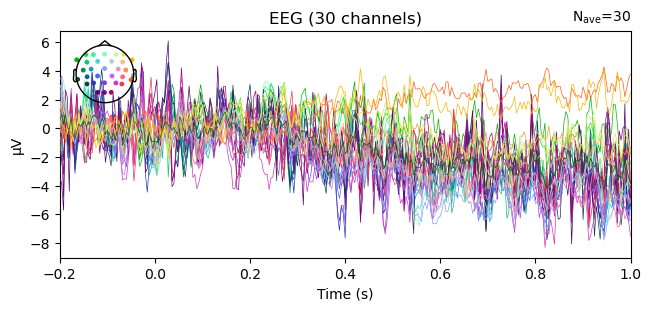

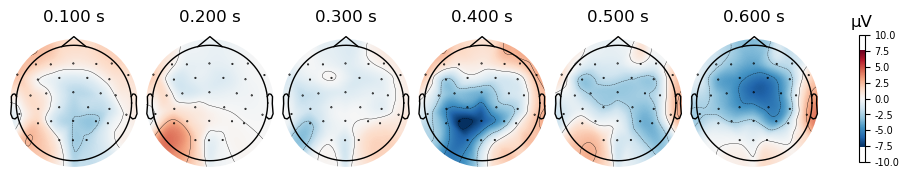

In [235]:
#| output: true

# read in data
file = '836_local_noswitch_epo.fif'
epoch = mne.read_epochs(input_dir + file, preload=True)

# average | get ERP for each condition
evoked = epoch.average(by_event_type=False)

# apply baseline
evoked.apply_baseline(baseline=pre_target_baseline)

# waveform
evoked.plot()

# scalp topography
times = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
evoked.plot_topomap(times=times, colorbar=True)

plt.show()

## topographical subplots

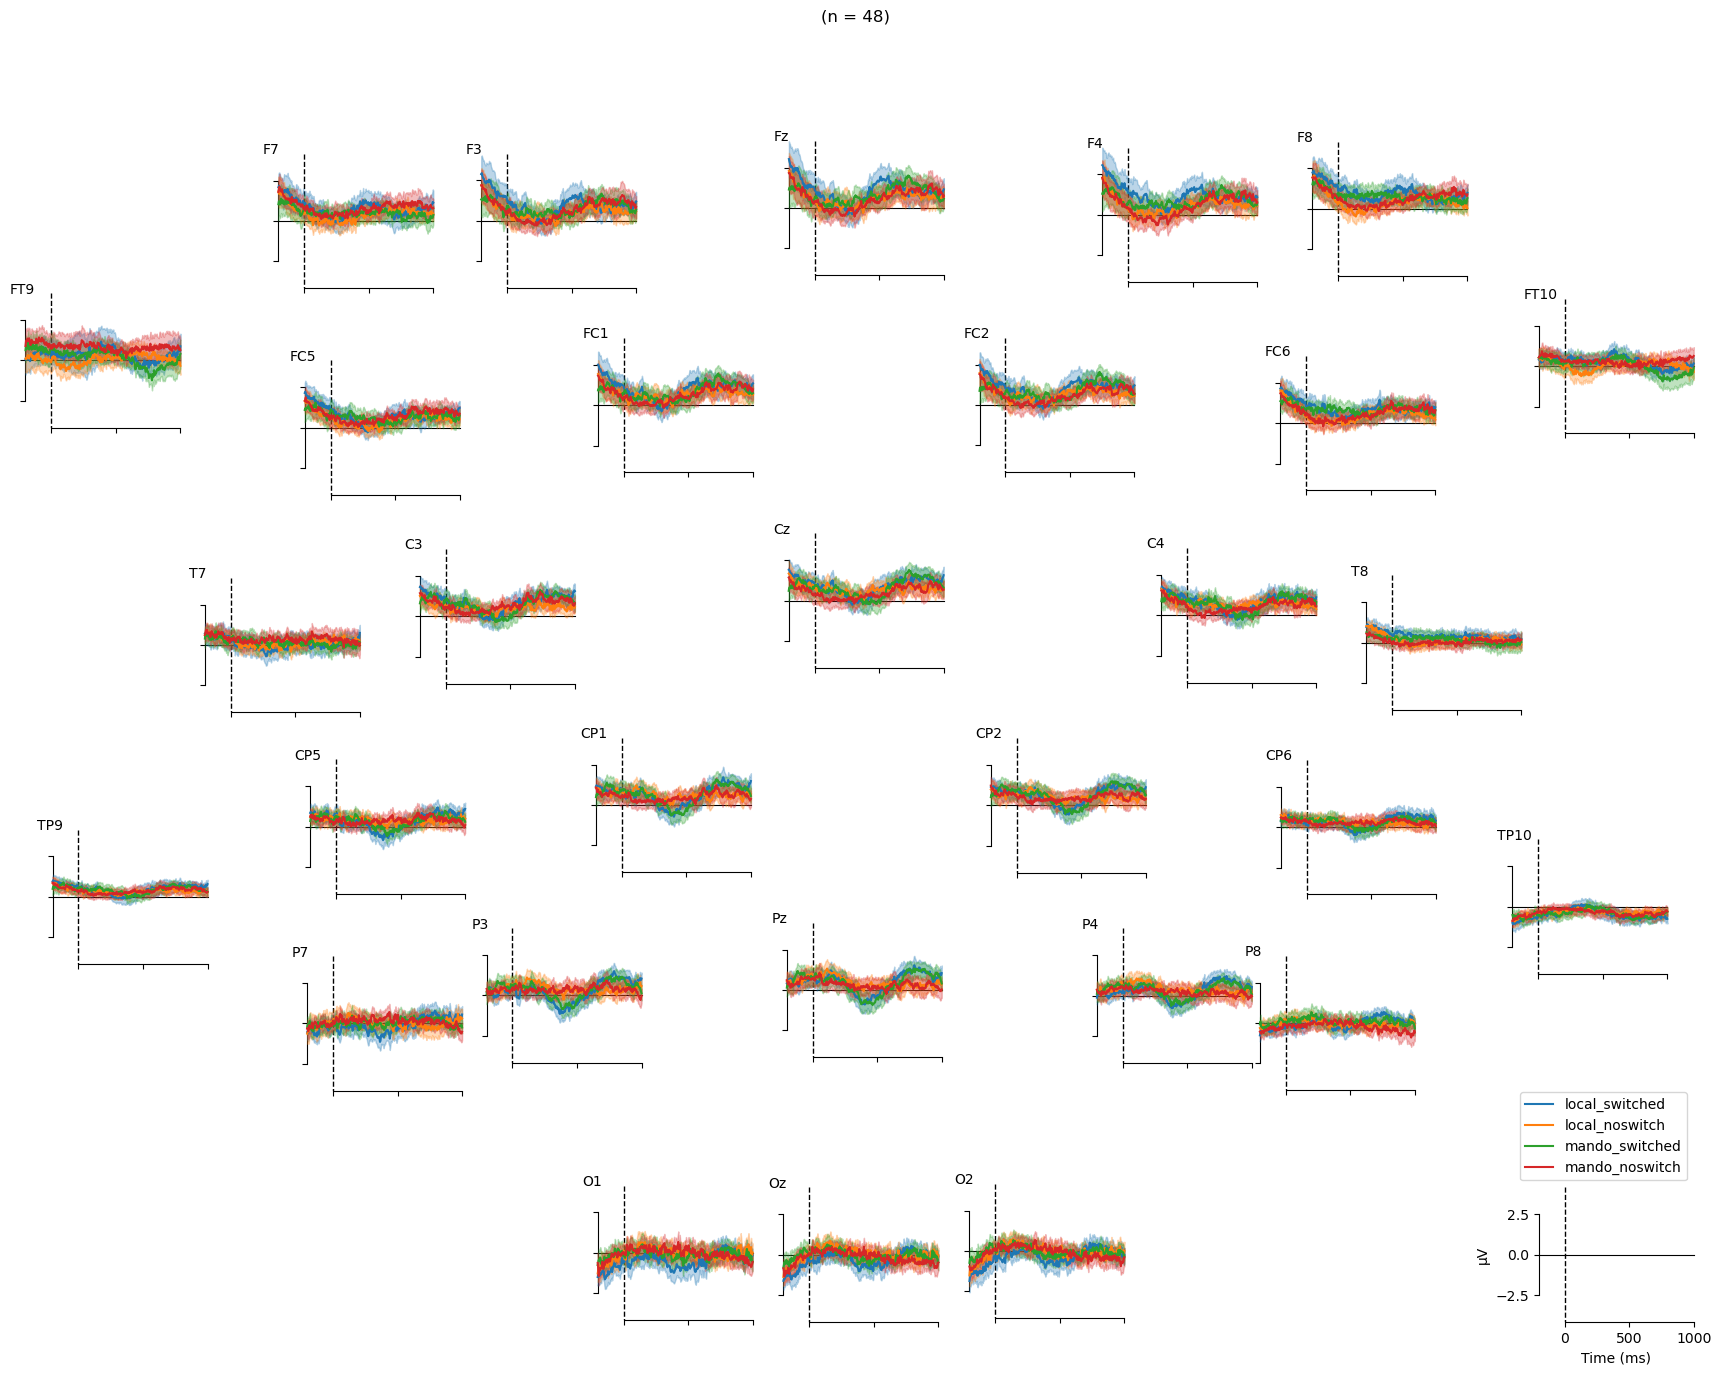

In [145]:
#| output: true

# read in the ERP data:
with open(input_dir + '/all_evokeds.pkl', 'rb') as file:
    all_evokeds = pickle.load(file)

# get the list of all participants that came this far
all_ppts = list(all_evokeds.keys())

# get participants that meet criteria
sub_ppts = []
for ppt in all_ppts:
    # if it is not in the bad subject list # 
    if ppt not in exclude_ppts:
        # append that subject to the list
        sub_ppts.append(ppt)



# extract ERPs for each condition
local_switched = []
local_noswitch = []
mando_switched = []
mando_noswitch = []

# for each participant
for ppt in sub_ppts:

    # extract item labels
    items = all_evokeds[ppt].keys()

    for cond in ['local_switched', 'local_noswitch', 'mando_switched', 'mando_noswitch']:
        # get condition list
        cond_list = [ x for x in items if x.rsplit('_', 1)[0]==cond ]

        # compute erp
        tmp= mne.combine_evoked([all_evokeds[ppt][x] for x in cond_list],
                                     weights='equal')
        # append erp to list
        eval(cond).append(tmp)

# add erp data to dictionary for plotting
evokeds = {}
for cond in ['local_switched', 'local_noswitch', 'mando_switched', 'mando_noswitch']:
    evokeds[cond] = eval(cond)



################################
#### Topographical subplots ####

# figure title for the waveform
waveform_title = '(n = ' + str(len(sub_ppts)) + ')'

# waveforms across scalp topo
# NOTE: I don't know how to save these plots using the code
fig = mne.viz.plot_compare_evokeds(
    evokeds,
    axes='topo',
    # picks=pick_chans,
    # combine="mean",
    show_sensors=True,
    # colors=colors,
    title = waveform_title,
    # ylim=dict(eeg=[-5, 5]),
    time_unit="ms",
    show=False,
);
##############################

## grand-average waves and topos

In [7]:
# save the plot?
# toggle_save_plot = True
toggle_save_plot = False

# # colors for each condition?
# color_devi = "crimson"
# color_stan = "steelblue"
# color_diff = 'black'

# times to show in topoplots (in seconds)
times = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# choose a channel(s) for ERP plot
pick_chans = ['Cz', 'Pz', 'CP1', 'CP2']

# get channel index
ch_inds = np.isin(chan_labels, pick_chans)


# create a dictionary for conditions ####
cell_dict = {
    'withinBlockMMN_English_in_Chinese': {'deviant': 'ChEn-devi', 'standard': 'ChEn-stan', 'devi_stim': 'English', 'stan_stim': 'Chinese'},
    'withinBlockMMN_Chinese_in_English': {'deviant': 'EnCh-devi', 'standard': 'EnCh-stan', 'devi_stim': 'Chinese', 'stan_stim': 'English'},
}

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


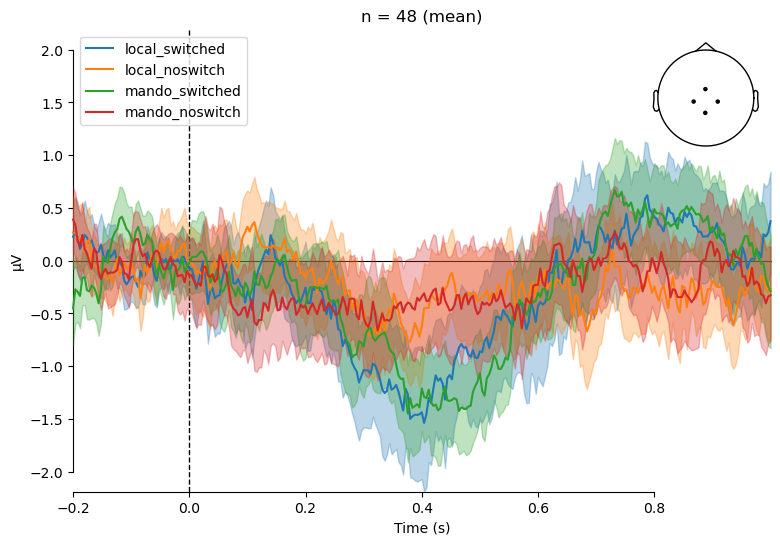

In [9]:
# get participant list
subset_ppts = []
for ppt in all_ppts:
    # if it is not in the bad subject list
    if ppt not in exclude_ppts:
        # append that subject to the list
        subset_ppts.append(ppt)



# extract ERPs for each condition
local_switched = []
local_noswitch = []
mando_switched = []
mando_noswitch = []

# for each participant
for ppt in subset_ppts:

    # extract item labels
    items = all_evokeds[ppt].keys()

    for cond in ['local_switched', 'local_noswitch', 'mando_switched', 'mando_noswitch']:
        # get condition list
        cond_list = [ x for x in items if x.rsplit('_', 1)[0]==cond ]

        # compute erp
        tmp= mne.combine_evoked([all_evokeds[ppt][x] for x in cond_list],
                                     weights='equal')
        # append erp to list
        eval(cond).append(tmp)

# add erp data to dictionary for plotting
evokeds = {}
for cond in ['local_switched', 'local_noswitch', 'mando_switched', 'mando_noswitch']:
    evokeds[cond] = eval(cond)



# ################################
# #### plot gav waveform ####
# ################################

# figure title for the waveform
waveform_title = 'n = ' + str(len(subset_ppts))

wave, ax = plt.subplots(1, 1, figsize=(9, 6))

mne.viz.plot_compare_evokeds(
    evokeds,
    axes=ax,
    picks=pick_chans,
    combine="mean",
    show_sensors=True,
    # colors=colors,
    title = waveform_title,
    # ylim=dict(eeg=[-5, 5]),
    time_unit="s",
    show=False
)
# save fig
if toggle_save_plot:
    wave.savefig(output_dir + '/wave.png')


#### topomap of difference wave (deviants minus standards) ####

# #### plotting topo ####

# topo = grand_avg_diff.plot_topomap(
#     ch_type="eeg", 
#     times=times, 
#     colorbar=True,
#     # vlim = (-2,2)
# )

# # save fig
# if toggle_save_plot:
#     topo.savefig(output_dir + '/topo.png')

# Temporal cluster-based permutation

In [115]:
############################
#### Parameters ############
############################

# directory
input_dir = work_dir + 'data_preprocessed/5_averaged/'

# participants to exclude
exclude_ppts = []


# read in the ERP data:
with open(input_dir + '/all_evokeds.pkl', 'rb') as file:  # Python 3: open(..., 'rb')
    all_evokeds = pickle.load(file)

# all participants that came this far
all_ppts = all_evokeds.keys()

# get time and channel info from any evoked data
evoked = all_evokeds['836']['local_noswitch_lunchbox']
time_labels = [str(int(x)) for x in evoked.times*1000]
chan_labels = evoked.info['ch_names']


# participant list
subset_ppts = []
# for each participant
for ppt in all_ppts:
    # if it is not in the bad participant list # 
    if (ppt not in exclude_ppts):
        # append that subject to the list
        subset_ppts.append(ppt)

# ##############
# # extract ERPs
# erp_diff = []
# for subj in subset_subs:
#     # compute temporary difference erp
#     tmp_diff = mne.combine_evoked(
#         [ all_evokeds[subj][key_devi[0]], all_evokeds[subj][key_stan[0]]] ],
#         weights=[1,-1] # 1 for devi, -1 for stan
#     )
#     # append temporary data to list
#     erp_diff.append(tmp_diff)
# ################

# extract ERPs for each condition
erp_diff = []

# for each participant
for ppt in subset_ppts:

    # extract item labels
    items = all_evokeds[ppt].keys()

    # get condition list
    cond_list = [ x for x in items if x.split('_')[1]=='switched' ]

    # compute erp
    switched = mne.combine_evoked([all_evokeds[ppt][x] for x in cond_list],
                                 weights='equal')
    # get condition list
    cond_list = [ x for x in items if x.split('_')[1]=='noswitch' ]

    # compute erp
    noswitch = mne.combine_evoked([all_evokeds[ppt][x] for x in cond_list],
                                 weights='equal')

    # difference
    tmp_diff = mne.combine_evoked([switched, noswitch],
                               weights=[1, -1])

    # append
    erp_diff.append(tmp_diff)


###################################
#### Find the adjacency matrix ####
###################################
# get channel info
# adjacency, chan_names = mne.channels.find_ch_adjacency(evoked.info, 'eeg')

# # # visualize
# mne.viz.plot_ch_adjacency(epochs.info, chan_adj, chan_names)
# plt.show()


#####################
#### compute MMN ####
#####################
# choose a channel(s) for ERP plot
pick_chans = ['Cz', 'Pz', 'CP1', 'CP2']
# pick_chans = ["Cz", "Fz", "FC1", "FC2", "C3", "C4", "CP1", "CP2"]
# pick_chans = ["Cz", "Fz"]
# pick_chans = ["Cz"]



# get channel index
chan_inds = np.isin(chan_labels, pick_chans)


# extract data for stats
X = np.stack([x.get_data()[chan_inds, :].mean(axis=0) for x in erp_diff], axis=0)

# # # check the shape
# # print(erp_diff_data.shape)


# # reshape the data for stats analysis
# X = np.transpose(erp_diff_data, [0, 2, 1]) # output: subject x time x channel

# print(X.shape)

###################################
#### cluster-based permutation ####
###################################


p_thresh = 0.01  # arbitrary
n_observations = X.shape[0]
df = n_observations - 1  # degrees of freedom for the test

# two-tailed test
tail = 0
t_thresh = stats.t.ppf(1 - p_thresh / 2, df)

# # one tail, 1 for higher tail, -1 for lower tail
# tail = -1
# t_thresh = stats.t.ppf(p_thresh, df)


# Run the analysis
T_obs, clusters, cluster_p_values, H0 = mne.stats.spatio_temporal_cluster_1samp_test(
    X,
    threshold=t_thresh,
    tail=tail,
    # adjacency=adjacency,
    out_type="mask",
    verbose=True,
    seed = 42 # set random seed
)

stat_fun(H1): min=-4.563917546439282 max=4.06994038927511
Running initial clustering …
Found 9 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

In [116]:
#########################
#### select clusters ####
#########################

# Select the clusters that are statistically significant at p < 0.05
p_accept = 0.05
good_clusters_idx = np.where(cluster_p_values < p_accept)[0]

print(good_clusters_idx)

[3 4 7]


Text(0, 0.5, 't-values')

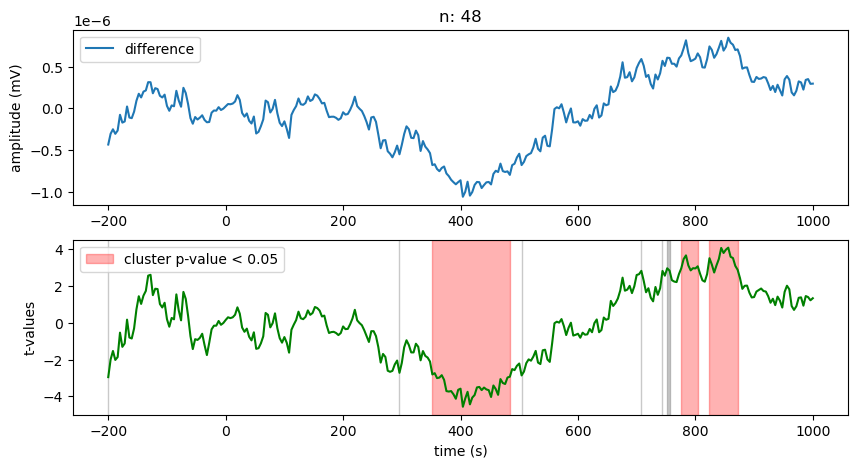

In [118]:
times = [int(x) for x in time_labels]
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(10, 5))
ax.set_title("n: " + str(n_observations))
ax.plot(
    times,
    X.mean(axis=0),
    label="difference",
)

ax.set_ylabel("amplitude (mV)")
ax.legend()

for i_c, c in enumerate(clusters):
    c = c[0]
    if cluster_p_values[i_c] <= p_accept:
        h = ax2.axvspan(times[c.start], times[c.stop - 1], color="r", alpha=0.3)
    else:
        ax2.axvspan(times[c.start], times[c.stop - 1], color=(0.3, 0.3, 0.3), alpha=0.3)

hf = plt.plot(times, T_obs, "g")
ax2.legend((h,), ("cluster p-value < 0.05",))
ax2.set_xlabel("time (s)")
ax2.set_ylabel("t-values")